#SOURCE:

http://nbviewer.jupyter.org/github/stephencwelch/Neural-Networks-Demystified/

In [115]:
from __future__ import division
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from scipy import optimize
from sklearn import datasets

import sklearn
if float(sklearn.__version__[:4])>=0.18:
    from sklearn.model_selection import train_test_split
else:
    from sklearn.cross_validation import train_test_split

%matplotlib inline

In [116]:
import numpy as np

class Neural_Network(object):
    def __init__(self, X, y, num_hidden = 10):
        #Define Hyperparameters
        self.inputLayerSize = X.shape[1]
        self.outputLayerSize = y.shape[1]
        self.hiddenLayerSize = num_hidden

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        self.Lambda = Lambda

    def normalization(self, X):
        return X/np.amax(X, axis=0)
        
    def forward(self, X):
        #Propagate inputs though network, get yHat
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def cost(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + \
            (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costPrime(self, X, y):
        #Compute derivative with respect to W1 and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    #The same as costPrime, differs by output
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [117]:
from scipy import optimize

class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.cost(self.X, self.y))
        self.testJ.append(self.N.cost(self.X_test, self.y_test))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.cost(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X_train, y_train, X_test, y_test):
        #Make an internal variable for the callback function:
        self.X = X_train
        self.y = y_train
        
        self.X_test = X_test
        self.y_test = y_test

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 5000, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X_train, y_train), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [118]:
data = datasets.load_iris()
X = data.data
y = data.target
y = data.target.reshape((data.target.shape[0],1))

Lambda = 0.0000000000001
NN = Neural_Network(X,y, num_hidden = 50)

X = NN.normalization(X)
y = NN.normalization(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#regularization Parameter:


In [119]:
T = trainer(NN)

In [120]:
%%time
T.train(X_train,y_train, X_test, y_test)

Optimization terminated successfully.
         Current function value: 0.000111
         Iterations: 1539
         Function evaluations: 1678
         Gradient evaluations: 1678
CPU times: user 38.4 s, sys: 468 ms, total: 38.9 s
Wall time: 15.6 s


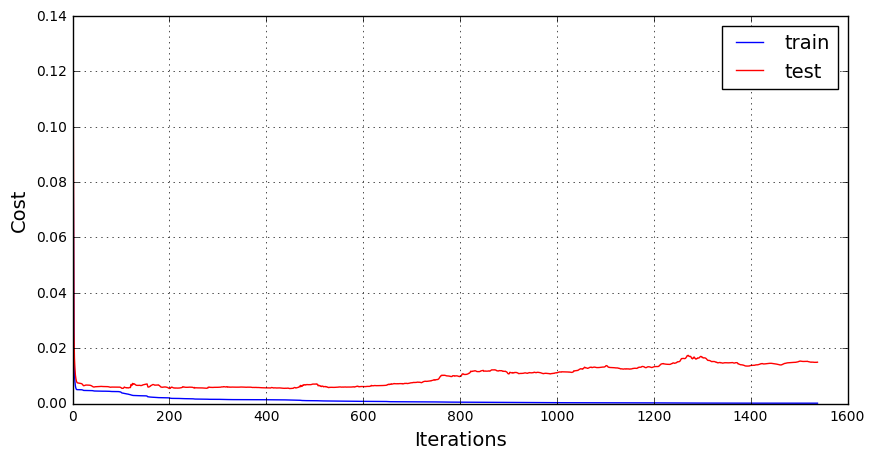

In [121]:
plt.figure(figsize=(10,5))
plt.plot(T.J, label = 'train', c='b')
plt.plot(T.testJ,  label='test', c='r')

plt.grid(1)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Cost',fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [124]:
y_pred = NN.forward(X)

In [125]:
for a,b in (zip(y,y_pred))[:10]:
    print "{:4.2f}\t{:4.2f}".format(a[0],b[0])
print "--------------------"
for a,b in (zip(y,y_pred))[70:80]:
    print "{:4.2f}\t{:4.2f}".format(a[0],b[0])
print "--------------------"
for a,b in (zip(y,y_pred))[-10:]:
    print "{:4.2f}\t{:4.2f}".format(a[0],b[0])

0.00	0.00
0.00	0.00
0.00	0.00
0.00	0.00
0.00	0.00
0.00	0.00
0.00	0.00
0.00	0.00
0.00	0.00
0.00	0.00
--------------------
0.50	0.99
0.50	0.52
0.50	0.53
0.50	0.50
0.50	0.52
0.50	0.49
0.50	0.50
0.50	0.53
0.50	0.45
0.50	0.48
--------------------
1.00	1.00
1.00	1.00
1.00	1.00
1.00	1.00
1.00	1.00
1.00	1.00
1.00	1.00
1.00	1.00
1.00	1.00
1.00	0.99
